<a href="https://colab.research.google.com/github/Parvezibrahim/Python-Projects/blob/main/Best_and_Worst_Days_to_Invest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description : To Determine the Best and Worst Days to Invest in Nifty 50


In [5]:
# Import the Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [10]:
#cCreate the List to store the daily simple return for each day
Mon = []
Tues = []
Wed= []
Thur = []
Fri = []
Sat = []
Sun = []

#Create a function to get daily siple return for each day and append it to the corresponding day
def get_dsr(day,dsr):

  if day == 'Monday':
    Mon.append(float(dsr))
  elif day == 'Tuesday':
    Tues.append(float(dsr))
  elif day == 'Wednesday':
    Wed.append(float(dsr))
  elif day == 'Thursday':
    Thur.append(float(dsr))
  elif day == 'Friday':
    Fri.append(float(dsr))
  elif day == 'Saturday':
    Sat.append(float(dsr))
  elif day == 'Sunday':
    Sun.append(float(dsr))
  else:
    print('Something is wrong with the input for the day')


    

In [14]:
#Load the Data Set
from google.colab import files
files.upload()

Saving data.csv to data.csv


{'data.csv': b'"Date","Open","High","Low","Close","Shares Traded","Turnover (Rs. Cr)"\n"03-Jan-2022","    17387.15","    17646.65","    17383.30","    17625.70","      200456430","        16181.36"\n"04-Jan-2022","    17681.40","    17827.60","    17593.55","    17805.25","      247437472","        18604.16"\n"05-Jan-2022","    17820.10","    17944.70","    17748.85","    17925.25","      251460038","        23737.31"\n"06-Jan-2022","    17768.50","    17797.95","    17655.55","    17745.90","      236454824","        22643.82"\n"07-Jan-2022","    17797.60","    17905.00","    17704.55","    17812.70","      239338015","        21447.89"\n"10-Jan-2022","    17913.30","    18017.45","    17879.15","    18003.30","      232418075","        20853.64"\n"11-Jan-2022","    17997.75","    18081.25","    17964.40","    18055.75","      220238796","        20781.46"\n"12-Jan-2022","    18170.40","    18227.95","    18128.80","    18212.35","      244974287","        22298.69"\n"13-Jan-2022","  

In [16]:
#Read the Data and store it into a variable
df = pd.read_csv('data.csv')

#Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))



#Show the Data
df


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
2022-01-03,03-Jan-2022,17387.15,17646.65,17383.30,17625.70,200456430,16181.36
2022-01-04,04-Jan-2022,17681.40,17827.60,17593.55,17805.25,247437472,18604.16
2022-01-05,05-Jan-2022,17820.10,17944.70,17748.85,17925.25,251460038,23737.31
2022-01-06,06-Jan-2022,17768.50,17797.95,17655.55,17745.90,236454824,22643.82
2022-01-07,07-Jan-2022,17797.60,17905.00,17704.55,17812.70,239338015,21447.89
...,...,...,...,...,...,...,...
2022-07-26,26-Jul-2022,16632.90,16636.10,16463.30,16483.85,208208122,20087.54
2022-07-27,27-Jul-2022,16475.35,16653.45,16438.75,16641.80,185210970,17608.03
2022-07-28,28-Jul-2022,16774.85,16947.65,16746.25,16929.60,376256315,26674.28
2022-07-29,29-Jul-2022,17079.50,17172.80,17018.15,17158.25,436059722,28241.29


In [19]:
#Calculate and show the daily simple return

DSR = df['Close'].pct_change(1)  #Compute the dsr
df['DSR'] = DSR

# Remove the first row of the data from the data set
df = df[1:]
#Show the current data set
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),DSR
2022-01-04,04-Jan-2022,17681.40,17827.60,17593.55,17805.25,247437472,18604.16,0.010187
2022-01-05,05-Jan-2022,17820.10,17944.70,17748.85,17925.25,251460038,23737.31,0.006740
2022-01-06,06-Jan-2022,17768.50,17797.95,17655.55,17745.90,236454824,22643.82,-0.010005
2022-01-07,07-Jan-2022,17797.60,17905.00,17704.55,17812.70,239338015,21447.89,0.003764
2022-01-10,10-Jan-2022,17913.30,18017.45,17879.15,18003.30,232418075,20853.64,0.010700
...,...,...,...,...,...,...,...,...
2022-07-26,26-Jul-2022,16632.90,16636.10,16463.30,16483.85,208208122,20087.54,-0.008848
2022-07-27,27-Jul-2022,16475.35,16653.45,16438.75,16641.80,185210970,17608.03,0.009582
2022-07-28,28-Jul-2022,16774.85,16947.65,16746.25,16929.60,376256315,26674.28,0.017294
2022-07-29,29-Jul-2022,17079.50,17172.80,17018.15,17158.25,436059722,28241.29,0.013506


In [21]:
#Create a loop to gather the daily simple returns of each day from the data set
for i in range (0,len(df)):
  df_date = str(df.index[i]) ##get the current data and cast into a string
  df_dsr = df['DSR'][i]
  df_month = df_date.split('-')[1]
  curr_date = df.index[i]
  df_weekday = calendar.day_name[curr_date.weekday()]

  #

  get_dsr(df_weekday , df_dsr)


In [22]:
# Create a function to average the returns of each weekday
def AVG(day):
  if not day: 
    return [0]
  else:
    return[sum(day)/len(day)]


In [24]:
#Create
df_returns = pd.DataFrame(index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
#

df_returns['AVG'] = AVG(Mon) + AVG(Tues) + AVG(Wed) + AVG(Thur) + AVG(Fri) + AVG(Sat) + AVG(Sun)


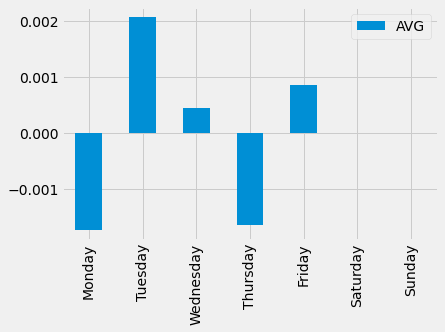

In [25]:
#Plot the daily simple returns
df_returns.plot.bar()